In [454]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
import math
from sklearn.neighbors import KNeighborsRegressor
import random
import numpy as np
import numpy.matlib
import sklearn.svm
import weatherdata
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


In [455]:
# loading separate datasets
mensdataset = read_csv('csv/mens_clothing.csv')
womensdataset = read_csv('csv/womens_clothing.csv')
othersdataset = read_csv('csv/other_clothing.csv')
#mensdataset['ProductCategory'] = 'Mens Clothing'
#del mensdataset['ProductCategory']
#mensdataset.head()

#othersdataset.head()
#weatherdataset

In [456]:
weatherdataset = read_csv('csv/weatherdata_final.csv')
#weatherdataset
#result = pd.merge(mensdataset, weatherdataset, on=['Year','Month'], how='inner')
#plt.plot(result['Temp Std'], result['Sales(In ThousandDollars)'])

In [457]:
#print(mensdataset.shape)
mensdataset = mensdataset[pd.notnull(mensdataset['Sales(In ThousandDollars)'])]
womensdataset = womensdataset[pd.notnull(womensdataset['Sales(In ThousandDollars)'])]
othersdataset = othersdataset[pd.notnull(othersdataset['Sales(In ThousandDollars)'])]
#print(mensdataset.shape)

In [458]:
mensGrp = womensdataset.groupby(['Year'])
#mensGrp.plot()
#plt.show

In [459]:
mensGrp = womensdataset.groupby(['Year'])
#mensGrp.plot()
#train_sales = pd.read_csv('csv/train_updated.csv')
#trainGrp = train_sales.groupby('Year')
#trainGrp.plot()
#plt.show()

In [460]:
#othersGrp = othersdataset.groupby(['Year'])
#othersGrp.plot()
#plt.show()

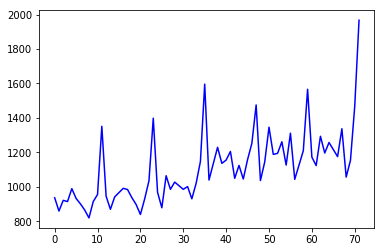

In [461]:
#plt.subplot(311)
#plt.plot(mensdataset['Sales(In ThousandDollars)'], 'b')

#plt.subplot(312)
#plt.plot( womensdataset['Sales(In ThousandDollars)'], 'b')

#plt.subplot(313)
plt.plot( othersdataset['Sales(In ThousandDollars)'], 'b')

In [462]:
scale = StandardScaler()
#pca = PCA()

#menScale = StandardScaler()
#womenScale = StandardScaler()
#othersScale = StandardScaler()
#traindataset = pd.read_csv('csv/train_updated.csv')

In [463]:
# preprocessing data
def preprocess(dataset,isTest, cate):
    dropcolumns = ['ProductCategory','PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)']
    macrodataset = read_csv('csv/train_macro.csv')
    weatherdataset = read_csv('csv/weatherdata_final.csv')
    eventdays = read_csv('csv/eventdays.csv')
    result = pd.merge(dataset, weatherdataset, on=['Year','Month'], how='inner')
    result = pd.merge(result, eventdays, on=['Year','Month'], how='left')
    result = result.fillna(0)
    frames = [result, macrodataset]
    traindataset = pd.concat(frames,axis=1)
    traindataset = traindataset.drop(dropcolumns,axis=1)
    traindataset.fillna(0, inplace=True)
    datavalues = traindataset.values
    xvalues = datavalues[:,3:]
    yvalues = datavalues[:,2]
    if(cate == 'men'):
        xvalues = scale.fit_transform(xvalues)
    elif(cate == 'women'):
        xvalues = scale.fit_transform(xvalues)
    else:
        xvalues = scale.fit_transform(xvalues)
    #print(xvalues.shape)
    #
    #xvalues = pca.fit_transform(xvalues)
    return train_test_split(xvalues, yvalues, test_size=0.2, random_state=100)
       


In [464]:
# models
def trainModel(x_train, y_train):    
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    return regr

def knnModel(x_train,y_train, k):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(x_train, y_train)
    return neigh

def svrModel(x_train,y_train):
    tuned_model = sklearn.svm.SVR(kernel = 'linear',C=1)
    tuned_model.fit(x_train, y_train)
    return tuned_model

def ridgeMode(x_train,y_train):
    clf = Ridge(alpha=1.0)
    clf.fit(x_train, y_train) 
    return clf


In [465]:
def drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict ):
    plt.figure()
    plt.subplot(311)
    plt.plot(meny_test,  color='black')
    plt.plot(men_predict, color='blue')
    plt.title('mens prediction')
    
    plt.subplot(312)
    plt.plot(womeny_test,  color='black')
    plt.plot(women_predict, color='blue')
    plt.title('womens prediction')
    
    plt.subplot(313)
    plt.plot(othersy_test,  color='black')
    plt.plot(other_predict, color='blue')
    plt.title('others prediction')
    plt.show()

In [466]:
isTest = False
menx_train, menx_test, meny_train, meny_test =  preprocess(mensdataset, isTest, 'men')
womenx_train, womenx_test, womeny_train, womeny_test =  preprocess(womensdataset,isTest, 'women' )
othersx_train, othersx_test, othersy_train, othersy_test =  preprocess(othersdataset, isTest, 'others')


#menx_train = menScale.fit_transform(menx_train)
#menx_test = menScale.transform(menx_test)
#womenx_train = womenScale.fit_transform(womenx_train)
#womenx_test = womenScale.transform(womenx_test)
#othersx_train = othersScale.fit_transform(othersx_train)
#othersx_test = othersScale.transform(othersx_test)


menx_train.shape,menx_test.shape,meny_train.shape,meny_test.shape

((57, 24), (15, 24), (57,), (15,))

men_rmse: 58.276 women_rmse: 342.994 others rmse: 105.187


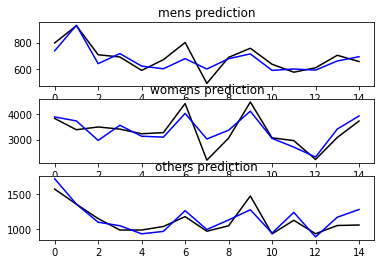

In [485]:
# checking with ridge regression model

param_grid = [
  {'alpha': [1, 10, 100, 1000], 'max_iter': [10000, 100000, 50000]},
 ]

menclf = Ridge(alpha=1.0)
menregr = GridSearchCV(menclf,param_grid)
menregr.fit(menx_train, meny_train) 

womenclf = Ridge(alpha=1.0)
womenregr = GridSearchCV(womenclf,param_grid)
womenregr.fit(womenx_train, womeny_train) 

otherclf = Ridge(alpha=1.0)
otherregr = GridSearchCV(otherclf,param_grid)
otherregr.fit(othersx_train, othersy_train) 


menregr = ridgeMode(menx_train,meny_train)
womenregr = ridgeMode(womenx_train,womeny_train)
othersregr = ridgeMode(othersx_train, othersy_train)

menregr.fit(menx_train, meny_train) 
womenregr.fit(womenx_train, womeny_train) 
otherregr.fit(othersx_train, othersy_train) 


men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = otherregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

men_rmse: 149.397 women_rmse: 883.514 others rmse: 104.665


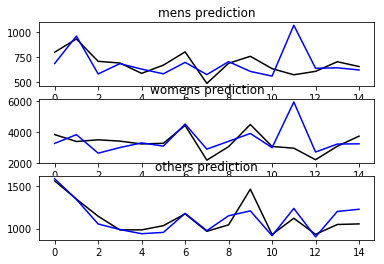

In [470]:
# checking with linear regression model
menregr = trainModel(menx_train,meny_train)
womenregr = trainModel(womenx_train,womeny_train)
othersregr = trainModel(othersx_train, othersy_train)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

men_rmse: 101.877 women_rmse: 544.930 others rmse: 159.573


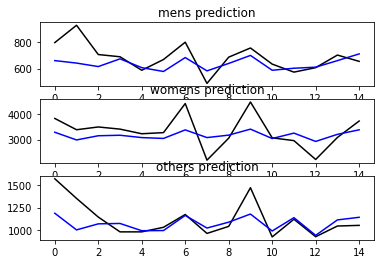

In [471]:
# checking with svr model
menregr = svrModel(menx_train,meny_train)
womenregr = svrModel(womenx_train,womeny_train)
othersregr = svrModel(othersx_train, othersy_train)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

In [483]:

param_grid = {'n_neighbors': [3,4,5,6,7,8,9], 'weights': ['uniform','distance'], 'algorithm' : ['brute', 'kd_tree', 'ball_tree', 'auto'],
  'p' :[1,2,3,4,5,6], 'leaf_size' : [20,30,40] }

neigh = KNeighborsRegressor()
menregr = GridSearchCV(neigh, param_grid)
menregr.fit(menx_train,meny_train)
print(menregr.best_params_)

neigh = KNeighborsRegressor()
womenregr = GridSearchCV(neigh, param_grid)
womenregr.fit(womenx_train,womeny_train)
print(womenregr.best_params_)


neigh = KNeighborsRegressor()
othersregr = GridSearchCV(neigh, param_grid)
othersregr.fit(othersx_train,othersy_train)
print(othersregr.best_params_)


men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))

print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)
    

{'algorithm': 'brute', 'leaf_size': 20, 'weights': 'distance', 'n_neighbors': 3, 'p': 6}
{'algorithm': 'brute', 'leaf_size': 20, 'weights': 'distance', 'n_neighbors': 3, 'p': 3}
{'algorithm': 'brute', 'leaf_size': 20, 'weights': 'distance', 'n_neighbors': 3, 'p': 4}
men_rmse: 83.576 women_rmse: 470.570 others rmse: 125.210


In [473]:
# k-nn model
s = 9999999
best_k = 0

for epoch in range(1,30):
    k = random.randint(1,5)
    #k = epoch
    #print(k)
    menregr = knnModel(menx_train,meny_train,k)
    womenregr = knnModel(womenx_train,womeny_train,k)
    othersregr = knnModel(othersx_train, othersy_train,k)

    men_predict = menregr.predict(menx_test)
    women_predict = womenregr.predict(womenx_test)
    other_predict = othersregr.predict(othersx_test)

    men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
    women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
    other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))
    ss = men_rmse + women_rmse + other_rmse
    if(ss < s):
        best_k = k
        s = ss
    #print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)
    

print(best_k)


3


men_rmse: 173.328 women_rmse: 520.752 others rmse: 163.703


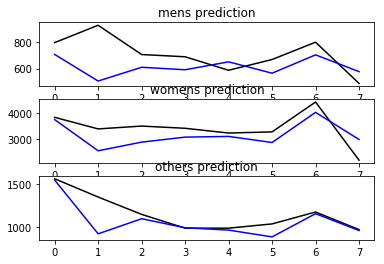

men_rmse: 73.398 women_rmse: 339.128 others rmse: 97.053


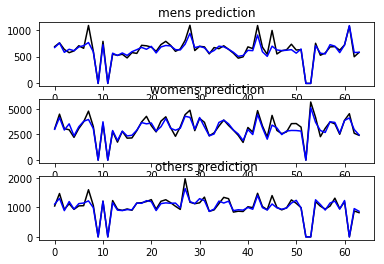

In [442]:
#best_k = 8
menregr = knnModel(menx_train,meny_train,best_k)
womenregr = knnModel(womenx_train,womeny_train,best_k)
othersregr = knnModel(othersx_train, othersy_train,best_k)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_test))

print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )

men_predict = menregr.predict(menx_train)
women_predict = womenregr.predict(womenx_train)
other_predict = othersregr.predict(othersx_train)

men_rmse = math.sqrt(mean_squared_error(men_predict, meny_train))
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_train))
other_rmse = math.sqrt(mean_squared_error(other_predict, othersy_train))

print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)


drwaplots(meny_train,men_predict,womeny_train, women_predict,othersy_train,other_predict )

In [443]:
# Random Forest classifier
# using randomized search
from scipy.stats import randint
from sklearn.grid_search import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
import time

bestparams = {}
accu = 9999999
for epoch in range(20):
    clf_rfc = RandomForestRegressor(random_state=100)
    params = {"max_depth": randint(1,5),
              "n_estimators" : randint(1,5),
              "max_features" : randint(5,20)}

    menregr = RandomizedSearchCV(clf_rfc, params)
    start = time.time()
    menregr.fit(menx_train, meny_train)
    men_predict = menregr.predict(menx_test)

    print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
    men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
    print(men_rmse)
    print(menregr.best_params_)
    if(men_rmse < accu):
        bestparams = menregr.best_params_
        accu = men_rmse
print(bestparams)

[INFO] randomized search took 0.18 seconds
98.26902755371505
{'max_depth': 3, 'n_estimators': 3, 'max_features': 7}
[INFO] randomized search took 0.19 seconds
72.94022019229278
{'max_depth': 4, 'n_estimators': 3, 'max_features': 18}
[INFO] randomized search took 0.24 seconds
96.82504881427704
{'max_depth': 3, 'n_estimators': 4, 'max_features': 7}
[INFO] randomized search took 0.21 seconds
80.13350368226801
{'max_depth': 4, 'n_estimators': 4, 'max_features': 7}
[INFO] randomized search took 0.17 seconds
88.15604471157775
{'max_depth': 4, 'n_estimators': 3, 'max_features': 14}
[INFO] randomized search took 0.20 seconds
127.23281984744277
{'max_depth': 3, 'n_estimators': 3, 'max_features': 6}
[INFO] randomized search took 0.18 seconds
85.83648316008849
{'max_depth': 3, 'n_estimators': 3, 'max_features': 19}
[INFO] randomized search took 0.18 seconds
77.40979186722433
{'max_depth': 4, 'n_estimators': 3, 'max_features': 19}
[INFO] randomized search took 0.18 seconds
119.16852686886622
{'max

68.51425795868609


Text(0.5,1,'mens prediction')

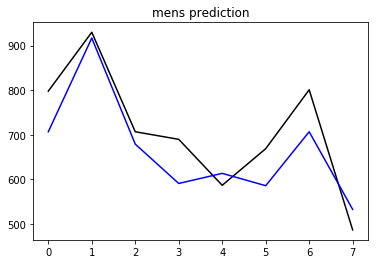

In [446]:
menregr = RandomForestRegressor(random_state=100, max_depth= 4, n_estimators = 4, max_features = 16)
menregr.fit(menx_train, meny_train)
men_predict = menregr.predict(menx_test)
men_rmse = math.sqrt(mean_squared_error(men_predict, meny_test))
print(men_rmse)
plt.plot(meny_test,  color='black')
plt.plot(men_predict, color='blue')
plt.title('mens prediction')

In [445]:
bestparams = {}
accu = 9999999
for epoch in range(20):
    clf_rfc = RandomForestRegressor(random_state=100)
    params = {"max_depth": randint(1,5),
              "n_estimators" : randint(1,5),
              "max_features" : randint(10,25)}
    womenregr = RandomizedSearchCV(clf_rfc, params)
    start = time.time()
    womenregr.fit(womenx_train, womeny_train)
    women_predict = womenregr.predict(womenx_test)
    
    print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
    men_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
    print(men_rmse)
    print(womenregr.best_params_)
    if(men_rmse < accu):
        bestparams = womenregr.best_params_
        accu = men_rmse
print(bestparams)

#women_predict = womenregr.predict(womenx_test)

[INFO] randomized search took 0.21 seconds
903.8717083678534
{'max_depth': 3, 'n_estimators': 3, 'max_features': 10}
[INFO] randomized search took 0.20 seconds
716.3350889929247
{'max_depth': 3, 'n_estimators': 4, 'max_features': 11}
[INFO] randomized search took 0.24 seconds
521.2309648819627
{'max_depth': 3, 'n_estimators': 4, 'max_features': 14}
[INFO] randomized search took 0.17 seconds
553.9400025262862
{'max_depth': 3, 'n_estimators': 4, 'max_features': 20}
[INFO] randomized search took 0.18 seconds
491.6167878261904
{'max_depth': 3, 'n_estimators': 2, 'max_features': 14}
[INFO] randomized search took 0.24 seconds
538.0820639599098
{'max_depth': 3, 'n_estimators': 4, 'max_features': 17}
[INFO] randomized search took 0.19 seconds
716.3350889929247
{'max_depth': 3, 'n_estimators': 4, 'max_features': 11}
[INFO] randomized search took 0.23 seconds
470.07981141202225
{'max_depth': 4, 'n_estimators': 4, 'max_features': 20}
[INFO] randomized search took 0.17 seconds
821.2437481917083
{'

470.07981141202225


Text(0.5,1,'womens prediction')

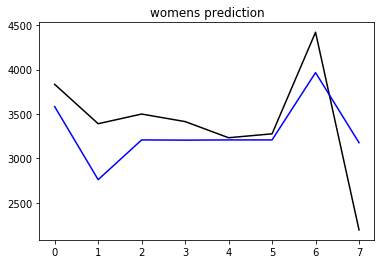

In [447]:
womenregr = RandomForestRegressor(random_state=100,n_estimators = 4, max_depth = 4,max_features = 20 )
#womenregr = RandomizedSearchCV(clf_rfc, bestparams)
womenregr.fit(womenx_train, womeny_train)
women_predict = womenregr.predict(womenx_test)
women_rmse = math.sqrt(mean_squared_error(women_predict, womeny_test))
print(women_rmse)
plt.plot(womeny_test,  color='black')
plt.plot(women_predict, color='blue')
plt.title('womens prediction')

In [448]:
bestparams = {}
accu = 9999999
for epoch in range(10):
    clf_rfc = RandomForestRegressor(random_state=100)
    params = {"max_depth": randint(1, 5),
              "n_estimators" : randint(1,5),
              "max_features" : randint(5,25)}
    othersregr = RandomizedSearchCV(clf_rfc, params)
    start = time.time()
    othersregr.fit(othersx_train, othersy_train)
    others_predict = otherregr.predict(othersx_test)
    #print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
    men_rmse = math.sqrt(mean_squared_error(othersy_test, others_predict))
    print(men_rmse)
    print(othersregr.best_params_)
    if(men_rmse < accu):
        bestparams = othersregr.best_params_
        accu = men_rmse
print(bestparams)


59.1199420925157
{'max_depth': 2, 'n_estimators': 2, 'max_features': 12}
59.1199420925157
{'max_depth': 3, 'n_estimators': 4, 'max_features': 13}
59.1199420925157
{'max_depth': 3, 'n_estimators': 4, 'max_features': 7}
59.1199420925157
{'max_depth': 3, 'n_estimators': 2, 'max_features': 7}
59.1199420925157
{'max_depth': 3, 'n_estimators': 4, 'max_features': 19}
59.1199420925157
{'max_depth': 2, 'n_estimators': 4, 'max_features': 8}
59.1199420925157
{'max_depth': 2, 'n_estimators': 2, 'max_features': 13}
59.1199420925157
{'max_depth': 3, 'n_estimators': 2, 'max_features': 9}
59.1199420925157
{'max_depth': 3, 'n_estimators': 4, 'max_features': 23}
59.1199420925157
{'max_depth': 3, 'n_estimators': 2, 'max_features': 24}
{'max_depth': 2, 'n_estimators': 2, 'max_features': 12}


59.1199420925157


Text(0.5,1,'womens prediction')

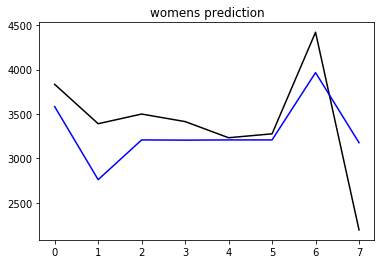

In [449]:
othersregr = RandomForestRegressor(random_state=100,max_depth= 2, n_estimators = 2,max_features =  12 )
start = time.time()
othersregr.fit(othersx_train, othersy_train)
others_predict = otherregr.predict(othersx_test)
#print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
others_rmse = math.sqrt(mean_squared_error(othersy_test, others_predict))
print(others_rmse)
plt.plot(womeny_test,  color='black')
plt.plot(women_predict, color='blue')
plt.title('womens prediction')

men_rmse: 59.120 women_rmse: 470.080 others rmse: 97.053


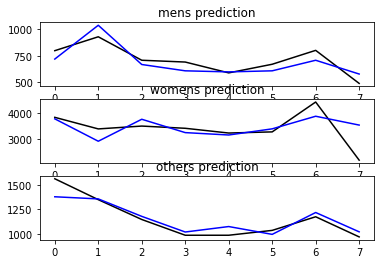

In [452]:
# RFS


menregr = RandomForestRegressor(max_depth=4, n_estimators = 5, random_state=42)
menregr.fit(menx_train, meny_train)

womenregr = RandomForestRegressor(max_depth=4,n_estimators = 5, random_state=42)
womenregr.fit(womenx_train, womeny_train)

othersregr = RandomForestRegressor(max_depth=4, n_estimators = 5, random_state=42)
othersregr.fit(othersx_train, othersy_train)

men_predict = menregr.predict(menx_test)
women_predict = womenregr.predict(womenx_test)
other_predict = othersregr.predict(othersx_test)

print('men_rmse: %.3f' % men_rmse, "women_rmse: %.3f" % women_rmse, 'others rmse: %.3f' % other_rmse)

drwaplots(meny_test,men_predict,womeny_test, women_predict,othersy_test,other_predict )


In [451]:
testdata = pd.read_csv('csv/test_data.csv')
testMacroData = pd.read_csv('csv/test_macro.csv')
weather = pd.read_csv("csv/weatherdata_final.csv", sep=",")
result = pd.merge(testdata, weather, on=['Year','Month'], how='inner')
eventdays = read_csv('csv/eventdays.csv')
result = pd.merge(result, eventdays, on=['Year','Month'], how='left')
result = result.fillna(0)
del result['Sales(In ThousandDollars)']
#result

In [429]:
# repeating macro business data for 3 categories
def preprocessTestMacroData(testMacroData):
    dropcolumns = ['PartyInPower','AdvertisingExpenses (in Thousand Dollars)','Change(in%)', 'Year','Month','Year-Month']
    testMacroData = testMacroData.drop(dropcolumns,axis=1)

    testMacroData.fillna(0)
    finalData = np.zeros((3*testMacroData.values.shape[0],testMacroData.values.shape[1]),dtype = object)
    for i,row in enumerate(testMacroData.values):    
        x =  np.array(row)
        x = np.matlib.repmat(x,3,1)
        finalData[i*3:3*i+3] = x
    changed = pd.DataFrame(finalData, columns = testMacroData.columns)
    return changed

In [431]:
test_macro = preprocessTestMacroData(testMacroData)
frames = [result, test_macro]
testdataset = pd.concat(frames,axis=1)
#testdataset

In [484]:
mensdata = []
womensdata = []
othersdata = []
data = testdataset.values
#ata = scale.transform(data)
for row in data:
    if row[2] == 'WomenClothing':
        womensdata.append(row[3:])
    elif row[2] == 'MenClothing':
        mensdata.append(row[3:])
    else:
        othersdata.append(row[3:])
mensdata = np.array(mensdata)
print((mensdata).shape)

#mensdata = menScale.transform(mensdata)
#womensdata = womenScale.transform(womensdata)
#othersdata = othersScale.transform(othersdata)

mensdata = scale.transform(mensdata)
womensdata = scale.transform(womensdata)
othersdata = scale.transform(othersdata)

#mensdata = pca.transform(mensdata)
#womensdata = pca.transform(womensdata)
#othersdata = pca.transform(othersdata)

men_predict = menregr.predict(mensdata)
women_predict = womenregr.predict(womensdata)
other_predict = othersregr.predict(othersdata)
predict = []
#rint(testdataset.values.shape)
for i in range(testdataset.values.shape[0]//3):
    predict.append(women_predict[i])
    predict.append(men_predict[i])
    predict.append(other_predict[i])

print(predict)
index = [i for i in range(1,37)]
out = [ [i+1, pred] for i,pred in enumerate(predict)]
output = pd.DataFrame(out,columns = ['Year','Sales(In ThousandDollars)'])
#originalData = testdataset.values[:,:3]
#testdata['Sales(In ThousandDollars)'] = predict
#testdataset
output.to_csv('csv/output.csv', sep=',', index=False)

(12, 24)
[4075.703223190013, 708.4250306187542, 1228.9836976558774, 4054.193250055218, 719.3369488862527, 1227.77665124128, 4124.606454784451, 718.5170191266385, 1204.9773546365311, 3919.0123867888046, 731.3405469054802, 1228.2056363163654, 4131.116265986823, 735.0963702589945, 1190.0818864587675, 4172.778879991532, 731.4202427480325, 1236.211024888952, 4125.806384114843, 718.1563231050108, 1249.3947076802672, 3926.508041910963, 718.3491554324476, 1197.7488751405635, 4110.545088376099, 724.8673164011043, 1193.2469799159758, 4074.2553713138736, 729.4859891850077, 1260.9246347411347, 4076.9733009014803, 698.5411271668161, 1263.5000753309123, 5031.8708674050185, 1078.8698496025538, 1598.0093229878996]


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
